In [111]:
from astropy.table import Table, Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import urllib.request
from scipy.interpolate import interp1d

In [166]:
import astropy.units as u
from astropy.cosmology import z_at_value, FlatLambdaCDM, Planck13

In [73]:
5e6

5000000.0

In [74]:
print("Step: 1")

Step: 1


In [75]:
# This will be the distance of the halo that you selected

DistanceOfRS0dot3=cosmo.comoving_distance(0.3)

In [76]:
DistanceOfRS0dot3

<Quantity 1194.39686972 Mpc>

In [77]:
print("Step: 2")

Step: 2


In [78]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
redshift = z_at_value(cosmo.comoving_distance, 5.0095024540353657*u.Mpc)

In [79]:
print(redshift)

0.0011700000000002514


In [80]:
# Set this distance to the halo you selected and add (1194.3969 - OriginalDistance) to the rest of the halos

In [81]:
# Preferable, do the ShellBox first, THEN change the distance to redshift

In [82]:
print("Step: 3")

Step: 3


In [83]:
# Add Doppler redshift to each particle

# ζ d = (Vz/c)*(1/1+ζ cosmo)
# Particle redshift  ζ p = ζ d + ζ cosmo

# We divide the speed of the particle over C (check units) and we multiply by 1 over the sum of 1 plus the
# redshift of the particle

#Then we add this DOppler redshift to the other one (should be zero for the 0.3 redshift halo)

In [84]:
from astropy import constants as const
const.c
Vz=2e8

In [85]:
TotalRedshift = (Vz/const.c)*(1/(1+redshift))

In [86]:
print(TotalRedshift)

0.6663485625780875 s / m


In [87]:
#
#
# Checar unidades de la variable "Redshift" y de "Vz" para que "TotalRedshift" tenga las unidades correctas. 
#
#

In [88]:
print("Step: 4")

Step: 4


In [89]:
# Compute Δθ (Angular separation from halo) and Δ ζ = ζhalo - ζparticle.

In [90]:
#
# se obtendran los angulos con Tan(θ)=CO/CA, donde el CA es la distancia del observador hasta la particula en el 
# eje Z, y CO es la distancia mas corta hasta el eje del observador, es decir sqrt(x^2 + y^2).
#

In [91]:
Halos = np.load("/home/benardorci/SimulationData/halos.npy")
DMP = np.load("/home/benardorci/SimulationData/dm_cat_ds_10000.npy")

In [92]:
np.size(DMP[:,0])

274140

In [156]:
x = np.linspace(0.01, 2250, num=22500, endpoint=True)

In [157]:
print(x)

[1.00000000e-02 1.10004000e-01 2.10008000e-01 ... 2.24979999e+03
 2.24990000e+03 2.25000000e+03]


In [158]:
#import random
#for x in range(10):
 #   print(random.randint(1,100))

In [159]:
yMin = z_at_value(cosmo.comoving_distance, x.min()*u.Mpc)
yMax = z_at_value(cosmo.comoving_distance, x.max()*u.Mpc)
ygrid = np.logspace(np.log10(yMin), np.log10(yMax), 22500)

#y1 = z_at_value(cosmo.comoving_distance, x.all()*u.Mpc, zmin=999)
#y2 = z_at_value(cosmo.comoving_distance, x.all()*u.Mpc, zmax=5000)

print(yMin)
print(yMax)
print(ygrid)

2.3362820299981736e-06
0.6142083115164456
[2.33628203e-06 2.33757826e-06 2.33887520e-06 ... 6.13527323e-01
 6.13867723e-01 6.14208312e-01]


In [117]:
print(np.size(x))
print(np.size(y1))

#f1 = interp1d(x, y1)
#f2 = interp1d(x, y2)

22501
1


In [163]:
z_at_value(cosmo.comoving_distance, 1190*u.Mpc)

0.2988035309568695

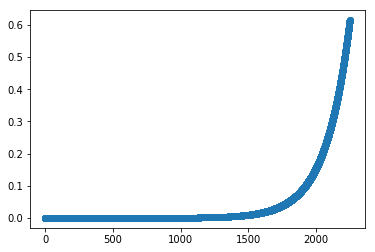

In [161]:
plt.plot(x, ygrid, 'o')
plt.show()

In [178]:
Dvals = (24 + np.random.rand(1000000) * 20) * u.mag

zmin = z_at_value(Planck13.distmod, Dvals.min())
zmax = z_at_value(Planck13.distmod, Dvals.max())
zgrid = np.logspace(np.log10(zmin), np.log10(zmax), 50)
Dgrid = Planck13.distmod(zgrid)

x = np.linspace(0.01, 2250, num=22500, endpoint=True)

[1.42616720e-04 1.70658707e-04 2.04214445e-04 2.44368073e-04
 2.92416901e-04 3.49913321e-04 4.18714965e-04 5.01044719e-04
 5.99562546e-04 7.17451424e-04 8.58520180e-04 1.02732656e-03
 1.22932445e-03 1.47104015e-03 1.76028316e-03 2.10639851e-03
 2.52056874e-03 3.01617511e-03 3.60923000e-03 4.31889419e-03
 5.16809598e-03 6.18427192e-03 7.40025326e-03 8.85532672e-03
 1.05965037e-02 1.26800394e-02 1.51732498e-02 1.81566873e-02
 2.17267427e-02 2.59987595e-02 3.11107609e-02 3.72279086e-02
 4.45478394e-02 5.33070503e-02 6.37885394e-02 7.63309495e-02
 9.13395086e-02 1.09299123e-01 1.30790043e-01 1.56506612e-01
 1.87279696e-01 2.24103532e-01 2.68167849e-01 3.20896304e-01
 3.83992481e-01 4.59494934e-01 5.49843042e-01 6.57955830e-01
 7.87326276e-01 9.42134163e-01]


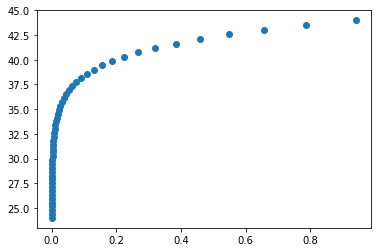

[24.00000629 24.38984311 24.77968912 25.16954614 25.55941633 25.94930226
 26.33920705 26.72913438 27.11908868 27.50907526 27.89910043 28.28917177
 28.67929834 29.06949094 29.4597625  29.85012848 30.2406073  30.63122101
 31.02199586 31.41296322 31.80416043 32.19563198 32.58743083 32.97961988
 33.37227383 33.76548117 34.15934657 34.55399353 34.94956735 35.34623842
 35.74420569 36.14370032 36.54498922 36.94837832 37.35421503 37.76288938
 38.17483302 38.59051506 39.01043349 39.4351007  39.86502167 40.30066343
 40.7424154  41.19054121 41.64512519 42.10601943 42.57280112 43.04475235
 43.52087458 43.99994544] mag


In [184]:
print(zgrid)
plt.plot(zgrid, Dgrid, 'o')
plt.show()
print(Dgrid)